<a href="https://colab.research.google.com/github/alifnadhifah/Tubes_Machine_Learning/blob/main/Tugas_Besar_Pembelajaran_Mesin_Tahap_2_1301184329_1301184255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anggota Kelompok**<BR>
<pre>
Nama : Ibnu Muzakky M. Noor 
NIM  : 1301184329
</pre>
<pre>
Nama : Alif Ranadian Nadhifah
NIM  : 1301184255
</pre>


# Library

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report

# Exploratory & Processing Data 

## Pre-Processing Data

### Train Data

In [ ]:
datasalju   = pd.read_csv("https://raw.githubusercontent.com/Ibnumuzakky/Dataset/main/salju_train.csv").drop('id', axis=1)
datasalju.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [ ]:
# Melihat jumlah row dan kolom data
datasalju.shape

(109095, 23)

In [ ]:
# Drop data yang duplikat
datasalju = datasalju.drop_duplicates()

In [ ]:
datasalju.shape

(109095, 23)

In [ ]:
datasalju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109095 entries, 0 to 109094
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tanggal                   109095 non-null  object 
 1   KodeLokasi                109095 non-null  object 
 2   SuhuMin                   107973 non-null  float64
 3   SuhuMax                   108166 non-null  float64
 4   Hujan                     106664 non-null  float64
 5   Penguapan                 62071 non-null   float64
 6   SinarMatahari             56716 non-null   float64
 7   ArahAnginTerkencang       101351 non-null  object 
 8   KecepatanAnginTerkencang  101399 non-null  float64
 9   ArahAngin9am              101172 non-null  object 
 10  ArahAngin3pm              105898 non-null  object 
 11  KecepatanAngin9am         107742 non-null  float64
 12  KecepatanAngin3pm         106792 non-null  float64
 13  Kelembaban9am             107093 non-null  f

Melihat value unique pada kolom data yang bertipe object

In [ ]:
# Melihat value unique pada kolom data yang bertipe object
datasalju.describe(include=["O"])

,Tanggal,KodeLokasi,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,BersaljuHariIni,BersaljuBesok
count,109095,109095,101351,101172,105898,106664,106664
unique,3414,49,16,16,16,2,2
top,31/03/2017,C1,W,N,SE,Tidak,Tidak
freq,45,2598,7491,8820,8204,82670,82701


In [ ]:
KodeLokasi = list(datasalju['KodeLokasi'].unique())
KodeLokasi

['C4',
 'C10',
 'C46',
 'C36',
 'C7',
 'C12',
 'C44',
 'C8',
 'C31',
 'C15',
 'C1',
 'C21',
 'C14',
 'C33',
 'C25',
 'C24',
 'C41',
 'C13',
 'C5',
 'C18',
 'C35',
 'C43',
 'C47',
 'C11',
 'C42',
 'C23',
 'C40',
 'C20',
 'C27',
 'C2',
 'C34',
 'C17',
 'C19',
 'C45',
 'C28',
 'C29',
 'C39',
 'C22',
 'C16',
 'C32',
 'C37',
 'C48',
 'C6',
 'C26',
 'C9',
 'C3',
 'C30',
 'C38',
 'C49']

In [ ]:
ArahAnginTerkencang = list(datasalju['ArahAnginTerkencang'].unique())
ArahAnginTerkencang

['WSW',
 nan,
 'ESE',
 'SSW',
 'N',
 'SW',
 'WNW',
 'W',
 'ENE',
 'S',
 'SE',
 'SSE',
 'E',
 'NNW',
 'NW',
 'NE',
 'NNE']

In [ ]:
ArahAngin9am = list(datasalju['ArahAngin9am'].unique())
ArahAngin9am

[nan,
 'SW',
 'SE',
 'N',
 'NNW',
 'NW',
 'WNW',
 'E',
 'ESE',
 'W',
 'NE',
 'NNE',
 'S',
 'SSE',
 'SSW',
 'WSW',
 'ENE']

In [ ]:
ArahAngin3pm = list(datasalju['ArahAngin3pm'].unique())
ArahAngin3pm

['WSW',
 'WNW',
 'SE',
 'SW',
 'ESE',
 'SSW',
 'NNW',
 nan,
 'W',
 'N',
 'NW',
 'S',
 'SSE',
 'ENE',
 'NE',
 'E',
 'NNE']

In [ ]:
BersaljuHariIni = list(datasalju['BersaljuHariIni'].unique())
BersaljuHariIni

['Ya', 'Tidak', nan]

In [ ]:
BersaljuBesok = list(datasalju['BersaljuBesok'].unique())
BersaljuBesok

['Tidak', 'Ya', nan]

In [ ]:
#Melakukan encode value data yang bertipe object menjadi bertipe integer/float
encode_dfs = {"KodeLokasi": {"C1":0, "C2":1, "C3":2, "C4":3, "C5":4, "C6":5, "C7":6, "C8":7, "C9":8, "C10":9, 
                             "C11":10, "C12":11, "C13":12, "C14":13, "C15":14, "C16":15, "C17":16, "C18":17, "C19":18, "C20":19,
                             "C21":20, "C22":21, "C23":22, "C24":23, "C25":24, "C26":25, "C27":26, "C28":27, "C29":28, "C30":29,
                             "C31":30, "C32":31, "C33":32, "C34":33, "C35":34, "C36":35, "C37":36, "C38":37, "C39":38, "C40":39, 
                             "C41":40, "C42":41, "C43":42, "C44":43, "C45":44, "C46":45, "C47":46, "C48":47, "C49":48},
              "ArahAnginTerkencang": {"E":0, "ENE":1, "ESE":2, "N":3, "NE":4, "NNE":5,
                                      "NNW":6, "NW":7, "S":8, "SE":9, "SSE":10,
                                      "SSW":11, "SW":12, "W":13, "WNW":14, "WSW":15},
              "ArahAngin9am": {"E":0, "ENE":1, "ESE":2, "N":3, "NE":4, "NNE":5,
                               "NNW":6, "NW":7, "S":8, "SE":9, "SSE":10,
                               "SSW":11, "SW":12, "W":13, "WNW":14, "WSW":15},
              "ArahAngin3pm": {"E":0, "ENE":1, "ESE":2, "N":3, "NE":4, "NNE":5,
                               "NNW":6, "NW":7, "S":8, "SE":9, "SSE":10,
                               "SSW":11, "SW":12, "W":13, "WNW":14, "WSW":15},
              "BersaljuHariIni": {"Ya":0 , "Tidak":1},
              "BersaljuBesok": {"Ya":0 , "Tidak":1}}
datasalju.replace(encode_dfs, inplace=True) 

In [ ]:
datasalju.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,01/06/2014,3,10.4,15.5,4.8,NaN,NaN,15.0,24.0,NaN,15.0,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,0.0,1.0
1,15/07/2014,9,9.0,17.0,8.0,2.6,7.4,NaN,NaN,12.0,14.0,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,0.0,0.0
2,16/02/2011,45,18.2,32.0,0.0,NaN,NaN,2.0,44.0,9.0,9.0,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,1.0,1.0
3,08/08/2012,35,7.3,24.5,0.0,8.4,10.4,11.0,54.0,3.0,12.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,1.0,1.0
4,29/10/2016,6,5.9,20.3,0.0,3.6,12.6,3.0,37.0,6.0,2.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,1.0,1.0


In [ ]:
datasalju.columns

Index(['Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan',
       'SinarMatahari', 'ArahAnginTerkencang', 'KecepatanAnginTerkencang',
       'ArahAngin9am', 'ArahAngin3pm', 'KecepatanAngin9am',
       'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am',
       'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm',
       'BersaljuHariIni', 'BersaljuBesok'],
      dtype='object')

In [ ]:
#mengecek dan menghitung jumlah nilai yang null/kosong
datasalju.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

In [ ]:
cols = ['Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan',
        'SinarMatahari', 'ArahAnginTerkencang', 'KecepatanAnginTerkencang',
        'ArahAngin9am', 'ArahAngin3pm', 'KecepatanAngin9am',
        'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am',
        'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm',
        'BersaljuHariIni', 'BersaljuBesok']
# Missing value handler
for col in cols:
    datasalju[col] = datasalju[col].fillna(datasalju[col].mode()[0]) 

In [ ]:
datasalju.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,01/06/2014,3,10.4,15.5,4.8,4.0,0.0,15.0,24.0,3.0,15.0,0.0,13.0,78.0,76.0,1020.1,1018.5,7.0,7.0,13.1,15.0,0.0,1.0
1,15/07/2014,9,9.0,17.0,8.0,2.6,7.4,13.0,35.0,12.0,14.0,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,0.0,0.0
2,16/02/2011,45,18.2,32.0,0.0,4.0,0.0,2.0,44.0,9.0,9.0,15.0,26.0,62.0,42.0,1016.4,1013.5,7.0,7.0,23.8,29.6,1.0,1.0
3,08/08/2012,35,7.3,24.5,0.0,8.4,10.4,11.0,54.0,3.0,12.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,1.0,1.0
4,29/10/2016,6,5.9,20.3,0.0,3.6,12.6,3.0,37.0,6.0,2.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,1.0,1.0


In [ ]:
datasalju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109095 entries, 0 to 109094
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tanggal                   109095 non-null  object 
 1   KodeLokasi                109095 non-null  int64  
 2   SuhuMin                   109095 non-null  float64
 3   SuhuMax                   109095 non-null  float64
 4   Hujan                     109095 non-null  float64
 5   Penguapan                 109095 non-null  float64
 6   SinarMatahari             109095 non-null  float64
 7   ArahAnginTerkencang       109095 non-null  float64
 8   KecepatanAnginTerkencang  109095 non-null  float64
 9   ArahAngin9am              109095 non-null  float64
 10  ArahAngin3pm              109095 non-null  float64
 11  KecepatanAngin9am         109095 non-null  float64
 12  KecepatanAngin3pm         109095 non-null  float64
 13  Kelembaban9am             109095 non-null  f

### Test Data

In [ ]:
datasalju_test   = pd.read_csv("https://raw.githubusercontent.com/Ibnumuzakky/Dataset/main/salju_test.csv") #.drop('id', axis=1)
datasalju_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [ ]:
# Drop data yang duplikat
datasalju_test = datasalju_test.drop_duplicates()

In [ ]:
datasalju_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

In [ ]:
# Melihat value unique pada kolom data yang bertipe object
datasalju_test.describe(include=["O"])

,Tanggal,KodeLokasi,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,BersaljuHariIni,BersaljuBesok
count,18182,18182,16901,16874,17686,17795,17763
unique,3151,49,16,16,16,2,2
top,23/02/2017,C24,SSE,N,SE,No,No
freq,14,426,1189,1460,1349,13830,13824


In [ ]:
BersaljuHariIni_test = list(datasalju_test['BersaljuHariIni'].unique())
BersaljuHariIni_test

['No', 'Yes', nan]

In [ ]:
BersaljuBesok_test = list(datasalju_test['BersaljuBesok'].unique())
BersaljuBesok_test

['No', 'Yes', nan]

In [ ]:
#Melakukan encode value data yang bertipe object menjadi bertipe integer/float
encode_dfst = {"KodeLokasi": {"C1":0, "C2":1, "C3":2, "C4":3, "C5":4, "C6":5, "C7":6, "C8":7, "C9":8, "C10":9, 
                              "C11":10, "C12":11, "C13":12, "C14":13, "C15":14, "C16":15, "C17":16, "C18":17, "C19":18, "C20":19,
                              "C21":20, "C22":21, "C23":22, "C24":23, "C25":24, "C26":25, "C27":26, "C28":27, "C29":28, "C30":29,
                              "C31":30, "C32":31, "C33":32, "C34":33, "C35":34, "C36":35, "C37":36, "C38":37, "C39":38, "C40":39, 
                              "C41":40, "C42":41, "C43":42, "C44":43, "C45":44, "C46":45, "C47":46, "C48":47, "C49":48},
               "ArahAnginTerkencang": {"E":0, "ENE":1, "ESE":2, "N":3, "NE":4, "NNE":5,
                                       "NNW":6, "NW":7, "S":8, "SE":9, "SSE":10,
                                       "SSW":11, "SW":12, "W":13, "WNW":14, "WSW":15},
               "ArahAngin9am": {"E":0, "ENE":1, "ESE":2, "N":3, "NE":4, "NNE":5,
                                "NNW":6, "NW":7, "S":8, "SE":9, "SSE":10,
                                "SSW":11, "SW":12, "W":13, "WNW":14, "WSW":15},
               "ArahAngin3pm": {"E":0, "ENE":1, "ESE":2, "N":3, "NE":4, "NNE":5,
                                "NNW":6, "NW":7, "S":8, "SE":9, "SSE":10,
                                "SSW":11, "SW":12, "W":13, "WNW":14, "WSW":15},
               "BersaljuHariIni": {"Yes":0 , "No":1},
               "BersaljuBesok": {"Yes":0 , "No":1}}
datasalju_test.replace(encode_dfst, inplace=True) #Test

In [ ]:
datasalju_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,38,11.0,27.5,0.0,NaN,6.4,15.0,46.0,13.0,13.0,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,1.0,1.0
1,26/03/2015,34,10.0,19.9,0.2,NaN,NaN,14.0,56.0,13.0,7.0,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,1.0,0.0
2,22/03/2016,17,9.2,27.2,0.0,5.2,10.4,11.0,33.0,4.0,3.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,1.0,1.0
3,09/12/2011,30,17.7,27.0,0.0,4.6,6.7,12.0,35.0,0.0,10.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,1.0,1.0
4,20/05/2017,13,2.3,7.9,88.0,NaN,NaN,7.0,46.0,13.0,14.0,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,0.0,1.0


In [ ]:
cols = ['Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan',
        'SinarMatahari', 'ArahAnginTerkencang', 'KecepatanAnginTerkencang',
        'ArahAngin9am', 'ArahAngin3pm', 'KecepatanAngin9am',
        'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am',
        'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm',
        'BersaljuHariIni', 'BersaljuBesok']
# Missing value handler
for col in cols:
    datasalju_test[col] = datasalju_test[col].fillna(datasalju_test[col].mode()[0]) #Test

In [ ]:
datasalju_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,38,11.0,27.5,0.0,4.0,6.4,15.0,46.0,13.0,13.0,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,1.0,1.0
1,26/03/2015,34,10.0,19.9,0.2,4.0,0.0,14.0,56.0,13.0,7.0,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,1.0,0.0
2,22/03/2016,17,9.2,27.2,0.0,5.2,10.4,11.0,33.0,4.0,3.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,1.0,1.0
3,09/12/2011,30,17.7,27.0,0.0,4.6,6.7,12.0,35.0,0.0,10.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,1.0,1.0
4,20/05/2017,13,2.3,7.9,88.0,4.0,0.0,7.0,46.0,13.0,14.0,13.0,9.0,98.0,95.0,1018.2,1016.6,7.0,7.0,4.4,6.0,0.0,1.0


In [ ]:
datasalju_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  int64  
 2   SuhuMin                   18182 non-null  float64
 3   SuhuMax                   18182 non-null  float64
 4   Hujan                     18182 non-null  float64
 5   Penguapan                 18182 non-null  float64
 6   SinarMatahari             18182 non-null  float64
 7   ArahAnginTerkencang       18182 non-null  float64
 8   KecepatanAnginTerkencang  18182 non-null  float64
 9   ArahAngin9am              18182 non-null  float64
 10  ArahAngin3pm              18182 non-null  float64
 11  KecepatanAngin9am         18182 non-null  float64
 12  KecepatanAngin3pm         18182 non-null  float64
 13  Kelembaban9am             18182 non-null  float64
 14  Kelemb

## Exploratory Data

Memvisualisasikan Dataset ke dalam bentuk Heatmap untuk melihat bagaimana korelasi antar atribut kolom dengan label kolom. Hal ini dilakukan untuk melihat atribut kolom mana yang paling berkaitan dengan label kolom. Sehingga hanya atribut kolom yang memiliki keterkaitan paling tinggi saja yang hanya akan digunakan pada pembangunan model nanti.

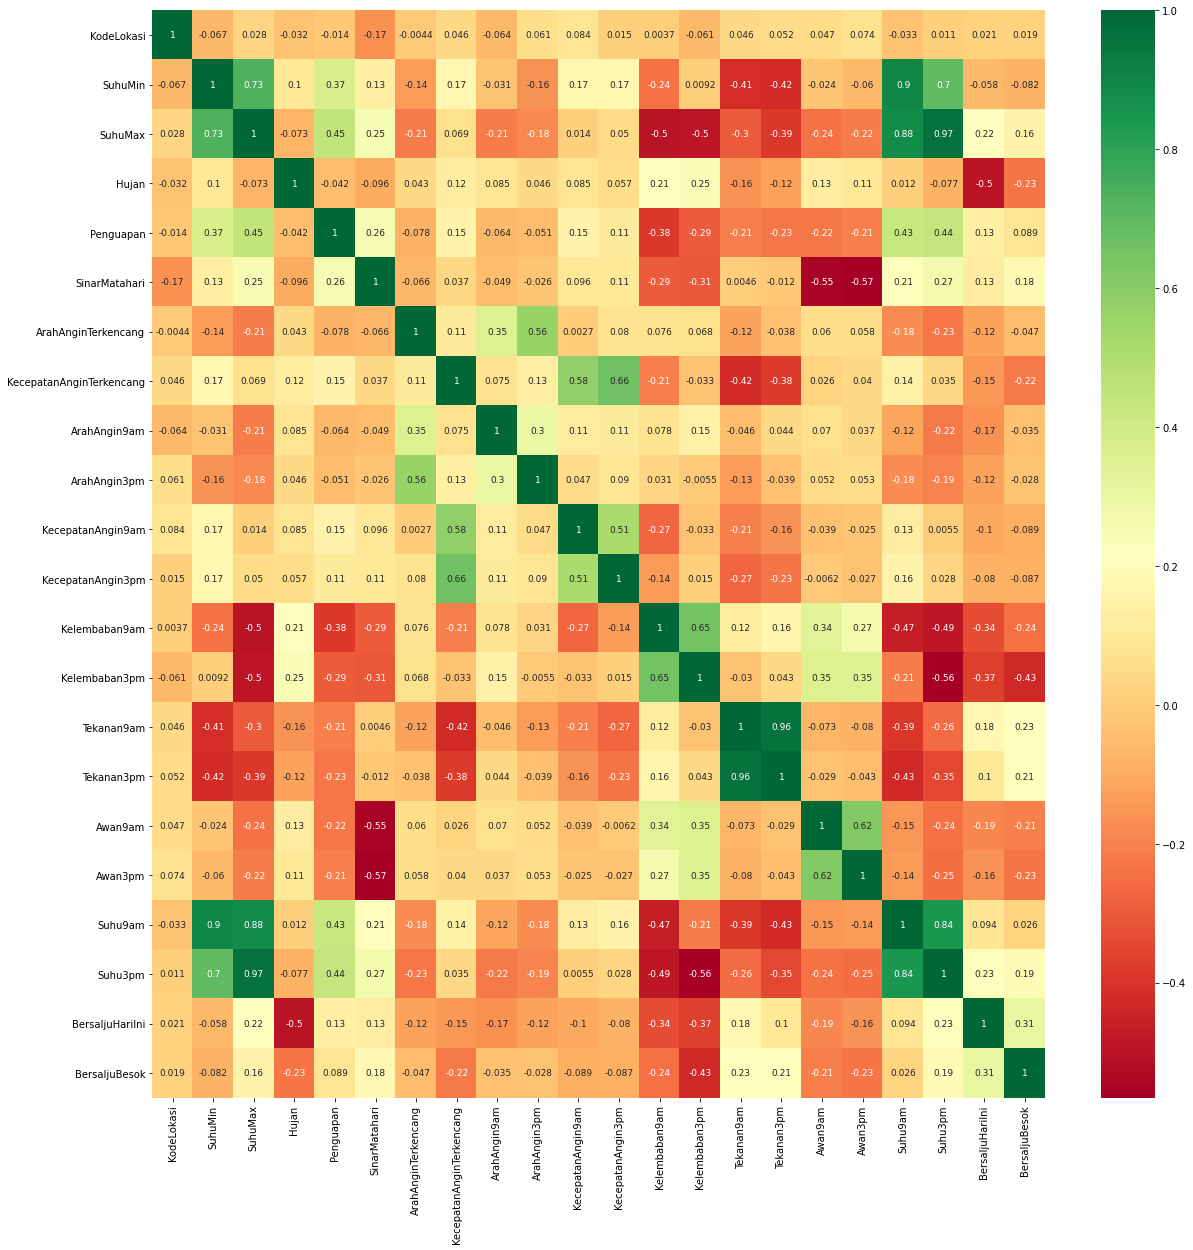

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(datasalju.corr(),
            annot=True, 
            annot_kws={'size':9}, 
            cmap='RdYlGn')

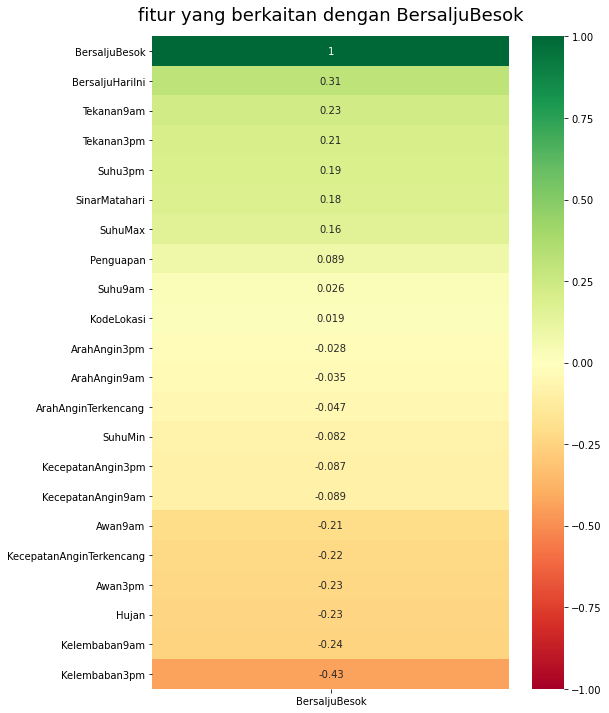

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(datasalju.corr()[['BersaljuBesok']].sort_values(by='BersaljuBesok', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('fitur yang berkaitan dengan BersaljuBesok', fontdict={'fontsize':18}, pad=16);

Atribut Yang Mempengaruhi Turun Salju Besok atau tidak:
1. BersaljuHariIni
2. Tekanan9am
3. Tekanan3pm
4. Suhu3pm
5. SinarMatahari
6. SuhuMax

# Pemodelan

## Split Data

In [ ]:
cols = ['SuhuMax', 'SinarMatahari', 'Tekanan9am', 'Tekanan3pm', 'Suhu3pm', 'BersaljuHariIni']
#Train
X_train = datasalju[cols].to_numpy()
y_train = datasalju['BersaljuBesok'].to_numpy()

#Test
X_test = datasalju_test[cols].to_numpy()
y_test = datasalju_test['BersaljuBesok'].to_numpy()


cols = ['SuhuMax', 'SinarMatahari', 'Tekanan9am', 'Tekanan3pm', 'Suhu3pm', 'BersaljuHariIni']
#Train
X_train = datasalju[cols].to_numpy()
y_train = datasalju['BersaljuBesok'].to_numpy()

#Test
X_test = datasalju_test[cols].to_numpy()
y_test = datasalju_test['BersaljuBesok'].to_numpy()


## Supervised Learning: Classification - Decission Tree

In [ ]:
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data train
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Evaluasi

In [ ]:
# Menghitung Nilai precission, recall, f1-score, accuracy, dan macro avg dari evaluasi data test dengan model yang telah dibangun 
#0.0 "Ya", 1.0 "Tidak"
y_pred = tree_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.40      0.44      0.42      3939
         1.0       0.84      0.82      0.83     14243

    accuracy                           0.74     18182
   macro avg       0.62      0.63      0.63     18182
weighted avg       0.75      0.74      0.74     18182



# Kesimpulan

In [ ]:
# Melihat perbandingan accuray score data train dan data test yang telah dilakukan evaluasi dengan menggunakan model yang telah dibangun
from sklearn.metrics import accuracy_score
y_pred_train = tree_model.predict(X_train)
print("Accuracy Score Data Train", accuracy_score(y_train, y_pred_train))
print("Accuracy Score Data Test", accuracy_score(y_test, y_pred))

Accuracy Score Data Train 0.9933360832302122
Accuracy Score Data Test 0.7375976240237597


In [ ]:
datasalju.to_csv('salju_train.csv')

In [ ]:
datasalju_test.to_csv('salju_test.csv')